*Source of the case study:* https://8weeksqlchallenge.com/case-study-4/

---

## Case Study #4 - Data Bank

**Introduction**
<br>There is a new innovation in the financial industry called Neo-Banks: new aged digital only banks without physical branches.

Danny thought that there should be some sort of intersection between these new age banks, cryptocurrency and the data world…so he decides to launch a new initiative - Data Bank!

Data Bank runs just like any other digital bank - but it isn’t only for banking activities, they also have the world’s most secure distributed data storage platform!

Customers are allocated cloud data storage limits which are directly linked to how much money they have in their accounts. There are a few interesting caveats that go with this business model, and this is where the Data Bank team need your help!

The management team at Data Bank want to increase their total customer base - but also need some help tracking just how much data storage their customers will need.

This case study is all about calculating metrics, growth and helping the business analyse their data in a smart way to better forecast and plan for their future developments!

**Available Data**
<br>The Data Bank team have prepared a data model for this case study as well as a few example rows from the complete dataset below to get you familiar with their tables.

**Entity Relationship Diagram**
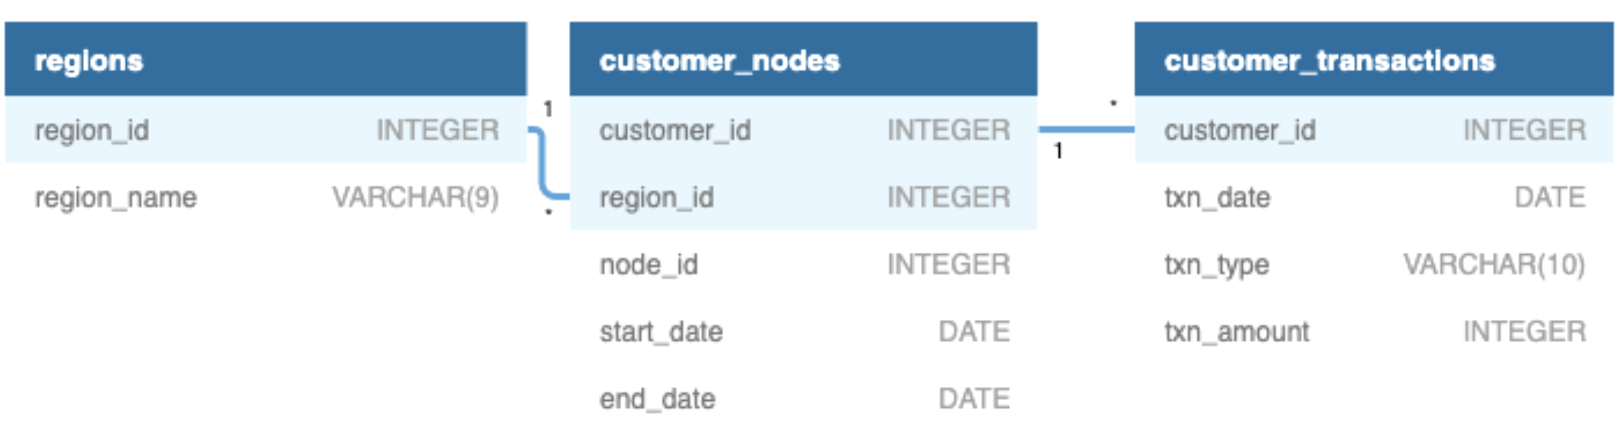

**Table 1: Regions**
<br>Just like popular cryptocurrency platforms - Data Bank is also run off a network of nodes where both money and data is stored across the globe. In a traditional banking sense - you can think of these nodes as bank branches or stores that exist around the world.

This `regions` table contains the `region_id` and their respective `region_name` values.

**Table 2: Customer Nodes**
<br>Customers are randomly distributed across the nodes according to their region - this also specifies exactly which node contains both their cash and data.

This random distribution changes frequently to reduce the risk of hackers getting into Data Bank’s system and stealing customer’s money and data!

**Table 3: Customer Transactions**
<br>This table stores all customer deposits, withdrawals and purchases made using their Data Bank debit card.

All datasets exist within the `data_bank` database schema, that you can find in an additional file.

**Case Study Questions**
<br>The following case study questions include some general data exploration analysis for the nodes and transactions before diving right into the core business questions and finishes with a challenging final request!

- **A. Customer Nodes Exploration**
    1. How many unique nodes are there on the Data Bank system?
    1. What is the number of nodes per region?
    1. How many customers are allocated to each region?
    1. How many days on average are customers reallocated to a different node?
    1. What is the median, 80th and 95th percentile for this same reallocation days metric for each region?

- **B. Customer Transactions**
    1. What is the unique count and total amount for each transaction type?
    1. What is the average total historical deposit counts and amounts for all customers?
    1. For each month - how many Data Bank customers make more than 1 deposit and either 1 purchase or 1 withdrawal in a single month?
    1. What is the closing balance for each customer at the end of the month?
    1. What is the percentage of customers who increase their closing balance by more than 5%?
    
---

**A. Customer Nodes Exploration**

**A1. How many unique nodes are there on the Data Bank system?**

**Query #1**

    SELECT COUNT(DISTINCT node_id) AS unique_nodes_cnt
    FROM data_bank.customer_nodes;

| unique_nodes_cnt |
| ---------------- |
| 5                |

There are only 5 unique nodes on the Data Bank system.

---

**A2. What is the number of nodes per region?**

**Query #2**

    SELECT region_name,
    	   COUNT(node_id) AS nodes_cnt
    FROM data_bank.customer_nodes n
    LEFT JOIN data_bank.regions r ON n.region_id=r.region_id
    GROUP BY region_name
    ORDER BY 2 DESC;

| region_name | nodes_cnt |
| ----------- | --------- |
| Australia   | 770       |
| America     | 735       |
| Africa      | 714       |
| Asia        | 665       |
| Europe      | 616       |

The largest number of nodes is in Australia, the least number of nodes is in Europe.

---

**A3. How many customers are allocated to each region?**

**Query #3**

    SELECT region_name,
    	   COUNT(DISTINCT customer_id) AS unique_customers_cnt
    FROM data_bank.customer_nodes n
    LEFT JOIN data_bank.regions r ON n.region_id=r.region_id
    GROUP BY region_name
    ORDER BY 2 DESC;

| region_name | unique_customers_cnt |
| ----------- | -------------------- |
| Australia   | 110                  |
| America     | 105                  |
| Africa      | 102                  |
| Asia        | 95                   |
| Europe      | 88                   |

As with nodes, the largest number of unique customers is in Australia, the least number of unique customers is in Europe.

---

**A4. How many days on average are customers reallocated to a different node?**

Since there are some rows where `end_date` = '9999-12-31', which probably means that these conditions were in place at the time when the extract was generated, let's calculate the average number of days not including rows with this date:

**Query #4**

    SELECT ROUND(AVG(end_date - start_date)) AS nodes_distribution_avg_days
    FROM data_bank.customer_nodes
    WHERE end_date != '9999-12-31';

| nodes_distribution_avg_days |
| --------------------------- |
| 15                          |

Therefore, customers reallocated to a different node on average during 15 days.

---

**A5. What is the median, 80th and 95th percentile for this same reallocation days metric for each region?**

**Query #5**

    SELECT region_name,
    	   percentile_cont(0.5) WITHIN GROUP (ORDER BY (end_date - start_date)) AS nodes_distribution_median_days,
           percentile_cont(0.8) WITHIN GROUP (ORDER BY (end_date - start_date)) AS nodes_distribution_80percentile_days,
           percentile_cont(0.95) WITHIN GROUP (ORDER BY (end_date - start_date)) AS nodes_distribution_95percentile_days
    FROM data_bank.customer_nodes n
    LEFT JOIN data_bank.regions r ON n.region_id=r.region_id
    WHERE end_date != '9999-12-31'
    GROUP BY region_name;

| region_name | nodes_distribution_median_days | nodes_distribution_80percentile_days | nodes_distribution_95percentile_days |
| ----------- | ------------------------------ | ------------------------------------ | ------------------------------------ |
| Africa      | 15                             | 24                                   | 28                                   |
| America     | 15                             | 23                                   | 28                                   |
| Asia        | 15                             | 23                                   | 28                                   |
| Australia   | 15                             | 23                                   | 28                                   |
| Europe      | 15                             | 24                                   | 28                                   |

Regions are quite similar to each other based on the 50th, 80th and 95th percentiles, - there is almost no difference.

---

**B. Customer Transactions**

**B1. What is the unique count and total amount for each transaction type?**

**Query #6**

    SELECT txn_type,
    	   COUNT(*) AS transaction_cnt,
           SUM(txn_amount) AS transaction_total_sum
    FROM data_bank.customer_transactions
    GROUP BY 1
    ORDER BY 3 DESC;

| txn_type   | transaction_cnt | transaction_total_sum |
| ---------- | --------------- | --------------------- |
| deposit    | 2671            | 1359168               |
| purchase   | 1617            | 806537                |
| withdrawal | 1580            | 793003                |

The largest total amount was spent on deposit transactions, and the number of deposit transactions is the largest.
<br>The amount and quantity of purchase and withdrawal transactions are quite similar.

---

**B2. What is the average total historical deposit counts and amounts for all customers?**

**Query #7**

    WITH t AS
    (SELECT customer_id,
    	    COUNT(*) AS deposit_cnt,
            SUM(txn_amount) AS deposit_total_sum
    FROM data_bank.customer_transactions
    WHERE txn_type ILIKE 'deposit'
    GROUP BY 1)
    SELECT ROUND(AVG(deposit_cnt)) AS avg_deposit_cnt,
    	   ROUND(AVG(deposit_total_sum)) AS avg_deposit_total_sum
    FROM t;

| avg_deposit_cnt | avg_deposit_total_sum |
| --------------- | --------------------- |
| 5               | 2718                  |

Therefore, the average total historical count is 5 deposits per customer, and the average deposit total amount per customer is 2718.

---

**B3. For each month - how many Data Bank customers make more than 1 deposit and either 1 purchase or 1 withdrawal in a single month?**

**Query #8**

    WITH t AS
    (SELECT customer_id,
    	    EXTRACT(MONTH FROM txn_date) AS txn_month,
    	    SUM(CASE WHEN txn_type ILIKE 'deposit' THEN 1 ELSE 0 END) AS deposit_cnt,
            SUM(CASE WHEN txn_type ILIKE 'purchase' THEN 1 ELSE 0 END) AS purchase_cnt,
            SUM(CASE WHEN txn_type ILIKE 'withdrawal' THEN 1 ELSE 0 END) AS withdrawal_cnt
    FROM data_bank.customer_transactions
    GROUP BY 1, 2)
    SELECT txn_month,
    	   COUNT(customer_id) AS customer_cnt
    FROM t
    WHERE deposit_cnt > 1 AND (purchase_cnt >= 1 OR withdrawal_cnt >= 1)
    GROUP BY 1
    ORDER BY 2 DESC;

| txn_month | customer_cnt |
| --------- | ------------ |
| 3         | 192          |
| 2         | 181          |
| 1         | 168          |
| 4         | 70           |

The highest number of the Data Bank customers that placed over 1 deposit and made at least 1 purchase or 1 withdrawal was in March, and the least - in April. (There are data only for 4 months of the 2020).

---

**B4. What is the closing balance for each customer at the end of the month?**

**Query #9**

    WITH t AS
    (SELECT customer_id,
    	    EXTRACT(MONTH FROM txn_date) AS txn_month,
            SUM(CASE WHEN txn_type ILIKE 'deposit' THEN txn_amount
           		     ELSE -txn_amount
                END) AS txn_amount
    FROM data_bank.customer_transactions
    GROUP BY 1, 2)
    SELECT customer_id,
    	   txn_month,
           txn_amount,
           SUM(txn_amount) OVER(PARTITION BY customer_id ORDER BY txn_month) AS txn_month_end_amount
    FROM t;

| customer_id | txn_month | txn_amount | txn_month_end_amount |
| ----------- | --------- | ---------- | -------------------- |
| 1           | 1         | 312        | 312                  |
| 1           | 3         | -952       | -640                 |
| 2           | 1         | 549        | 549                  |
| 2           | 3         | 61         | 610                  |
| 3           | 1         | 144        | 144                  |
| 3           | 2         | -965       | -821                 |
| 3           | 3         | -401       | -1222                |
| 3           | 4         | 493        | -729                 |
| 4           | 1         | 848        | 848                  |
| 4           | 3         | -193       | 655                  |
| 5           | 1         | 954        | 954                  |
| 5           | 3         | -2877      | -1923                |
| 5           | 4         | -490       | -2413                |
...
| 495         | 1         | -286       | -286                 |
| 495         | 2         | -1152      | -1438                |
| 495         | 3         | 1349       | -89                  |
| 496         | 1         | 47         | 47                   |
| 496         | 2         | -3123      | -3076                |
| 496         | 3         | 650        | -2426                |
| 497         | 1         | 754        | 754                  |
| 497         | 2         | 249        | 1003                 |
| 497         | 3         | 736        | 1739                 |
| 497         | 4         | 941        | 2680                 |
| 498         | 1         | 1360       | 1360                 |
| 498         | 2         | 835        | 2195                 |
| 498         | 3         | 794        | 2989                 |
| 498         | 4         | 499        | 3488                 |
| 499         | 1         | -304       | -304                 |
| 499         | 2         | 1719       | 1415                 |
| 499         | 3         | -816       | 599                  |
| 500         | 1         | 1594       | 1594                 |
| 500         | 2         | 1387       | 2981                 |
| 500         | 3         | -730       | 2251                 |

---

**B5. What is the percentage of customers who increase their closing balance by more than 5%?**

Let's assume that the question is about increasing the closing balance at the end of a current month in comparison with the closing balance of a previous month even if the balance is negative.

**Query #10**

    WITH t AS
    (SELECT customer_id,
    	    EXTRACT(MONTH FROM txn_date) AS txn_month,
            SUM(CASE WHEN txn_type ILIKE 'deposit' THEN txn_amount
           		     ELSE -txn_amount
                END) AS txn_amount
    FROM data_bank.customer_transactions
    GROUP BY 1, 2),
    t1 AS
    (SELECT customer_id,
    	    txn_month,
            txn_amount,
            SUM(txn_amount) OVER(PARTITION BY customer_id ORDER BY txn_month) AS txn_month_end_amount
    FROM t),
    t2 AS
    (SELECT customer_id,
    	    txn_month,
            CASE WHEN LAG(txn_month_end_amount) OVER(PARTITION BY customer_id ORDER BY txn_month) != 0 THEN (txn_month_end_amount - LAG(txn_month_end_amount) OVER(PARTITION BY customer_id ORDER BY txn_month)) / LAG(txn_month_end_amount) OVER(PARTITION BY customer_id ORDER BY txn_month)
           		 ELSE 0
            END AS txn_month_end_amount_change
    FROM t1)
    SELECT COUNT(DISTINCT customer_id) AS customer_increased_end_month_cnt,
    	   ROUND(COUNT(DISTINCT customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM t2) *100, 1) AS customer_increased_end_month_percentage
    FROM t2
    WHERE txn_month_end_amount_change > 0.05;

| customer_increased_end_month_cnt | customer_increased_end_month_percentage |
| -------------------------------- | --------------------------------------- |
| 379                              | 75.8                                    |

There are around 76% of customers whose month-end balance icreased for over 5% at least once, even if it was negative and next month there were more purchases or withdrawals.

---